In [1]:
import sys
!{sys.executable} -m pip install ta

  Created wheel for ta: filename=ta-0.5.25-py3-none-any.whl size=24884 sha256=1f7322e72d65fd36a51cc3d5107300d0702033f19eb5fbe5967bc4a33404e177
  Stored in directory: c:\users\thead\appdata\local\pip\cache\wheels\da\58\47\e9a2cbcf4374b34f18c4207eeab57571849f3c9dc858848e89
Successfully built ta


You should consider upgrading via the 'C:\Users\thead\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import os
import pandas as pd
import ta

df = pd.read_csv("Resources/BTC-USD.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2194,2020-09-19,10933.752930,11134.092773,10909.618164,11094.346680,11094.346680,2.276420e+10
2195,2020-09-20,11095.870117,11095.870117,10814.477539,10938.271484,10938.271484,2.469952e+10
2196,2020-09-21,10934.925781,10988.304688,10380.260742,10462.259766,10462.259766,2.888500e+10
2197,2020-09-22,10459.624023,10568.077148,10382.726563,10538.459961,10538.459961,2.362179e+10


In [3]:

def label(t_horizon):
    for row in df.index:
        if row < len(df.index)-1:
            # Calculate the maximum value for the next t_horizon rows of high values.
            df.loc[row, f"Max_{t_horizon}"] = max(df.loc[(row + 1):(row + t_horizon), "High"]) 
            # Calculate the minimum value for the next t_horizon rows of low values.
            df.loc[row, f"Min_{t_horizon}"] = min(df.loc[(row+1):(row+t_horizon), "Low"])
            # Calculate the percentage gain from going long if exits at optimal price next 3 days
            df.loc[row, f"Max_{t_horizon}_Percent_Increase"] = ((df.loc[row, f"Max_{t_horizon}"] - df.loc[row, "Close"]) / df.loc[row, "Close"])
            # Calculate the percentage gain from going Short if exits at optimal price next 3 days 
            df.loc[row, f"Min_{t_horizon}_Percent_Increase"] = ((df.loc[row, "Close"] - df.loc[row, f"Min_{t_horizon}"]) / df.loc[row, "Close"])
            # What was the optimal move? (SHORT or LONG)
            df.loc[row, f"Choice_{t_horizon}"] = "LONG" if df.loc[row, f"Max_{t_horizon}_Percent_Increase"] > df.loc[row, f"Min_{t_horizon}_Percent_Increase"] else "SHORT"
            # What is the optimate gain?
            df.loc[row, f"Gain_{t_horizon}"] = df.loc[row, f"Max_{t_horizon}_Percent_Increase"] if df.loc[row, f"Max_{t_horizon}_Percent_Increase"] > df.loc[row, f"Min_{t_horizon}_Percent_Increase"] else df.loc[row, f"Min_{t_horizon}_Percent_Increase"]
label(3)
label(6)

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Max_3,Min_3,Max_3_Percent_Increase,Min_3_Percent_Increase,Choice_3,Gain_3,Max_6,Min_6,Max_6_Percent_Increase,Min_6_Percent_Increase,Choice_6,Gain_6
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07,456.859985,384.532013,-0.001037,0.159188,SHORT,0.159188,456.859985,384.532013,-0.001037,0.159188,SHORT,0.159188
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,427.834991,384.532013,0.007999,0.094025,SHORT,0.094025,441.557007,384.532013,0.040328,0.094025,SHORT,0.094025
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,423.295990,389.882996,0.072189,0.012444,LONG,0.072189,441.557007,389.882996,0.118443,0.012444,LONG,0.118443
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,441.557007,393.181000,0.079855,0.038452,LONG,0.079855,441.557007,393.181000,0.079855,0.038452,LONG,0.079855
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,441.557007,396.196991,0.107156,0.006579,LONG,0.107156,441.557007,396.196991,0.107156,0.006579,LONG,0.107156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,2020-09-19,10933.752930,11134.092773,10909.618164,11094.346680,11094.346680,2.276420e+10,11095.870117,10380.260742,0.000137,0.064365,SHORT,0.064365,11095.870117,10380.260742,0.000137,0.064365,SHORT,0.064365
2195,2020-09-20,11095.870117,11095.870117,10814.477539,10938.271484,10938.271484,2.469952e+10,10988.304688,10380.260742,0.004574,0.051015,SHORT,0.051015,10988.304688,10380.260742,0.004574,0.051015,SHORT,0.051015
2196,2020-09-21,10934.925781,10988.304688,10380.260742,10462.259766,10462.259766,2.888500e+10,10586.853516,10382.726563,0.011909,0.007602,LONG,0.011909,10586.853516,10382.726563,0.011909,0.007602,LONG,0.011909
2197,2020-09-22,10459.624023,10568.077148,10382.726563,10538.459961,10538.459961,2.362179e+10,10586.853516,10398.071289,0.004592,0.013322,SHORT,0.013322,10586.853516,10398.071289,0.004592,0.013322,SHORT,0.013322


In [5]:
# Clean NaN values
df = ta.utils.dropna(df)

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Max_3,Min_3,Max_3_Percent_Increase,Min_3_Percent_Increase,Choice_3,Gain_3,Max_6,Min_6,Max_6_Percent_Increase,Min_6_Percent_Increase,Choice_6,Gain_6
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07,456.859985,384.532013,-0.001037,0.159188,SHORT,0.159188,456.859985,384.532013,-0.001037,0.159188,SHORT,0.159188
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,427.834991,384.532013,0.007999,0.094025,SHORT,0.094025,441.557007,384.532013,0.040328,0.094025,SHORT,0.094025
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,423.295990,389.882996,0.072189,0.012444,LONG,0.072189,441.557007,389.882996,0.118443,0.012444,LONG,0.118443
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,441.557007,393.181000,0.079855,0.038452,LONG,0.079855,441.557007,393.181000,0.079855,0.038452,LONG,0.079855
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,441.557007,396.196991,0.107156,0.006579,LONG,0.107156,441.557007,396.196991,0.107156,0.006579,LONG,0.107156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,2020-09-18,10951.820313,11034.908203,10829.657227,10944.585938,10944.585938,2.634190e+10,11134.092773,10380.260742,0.017315,0.051562,SHORT,0.051562,11134.092773,10380.260742,0.017315,0.051562,SHORT,0.051562
2194,2020-09-19,10933.752930,11134.092773,10909.618164,11094.346680,11094.346680,2.276420e+10,11095.870117,10380.260742,0.000137,0.064365,SHORT,0.064365,11095.870117,10380.260742,0.000137,0.064365,SHORT,0.064365
2195,2020-09-20,11095.870117,11095.870117,10814.477539,10938.271484,10938.271484,2.469952e+10,10988.304688,10380.260742,0.004574,0.051015,SHORT,0.051015,10988.304688,10380.260742,0.004574,0.051015,SHORT,0.051015
2196,2020-09-21,10934.925781,10988.304688,10380.260742,10462.259766,10462.259766,2.888500e+10,10586.853516,10382.726563,0.011909,0.007602,LONG,0.011909,10586.853516,10382.726563,0.011909,0.007602,LONG,0.011909


In [7]:
ema_6 = ta.trend.ema_indicator(close = df["Close"], n = 6)
ema_12 = ta.trend.ema_indicator(close = df["Close"], n = 12)
ema_24 = ta.trend.ema_indicator(close = df["Close"], n = 24)

In [8]:
ema_12

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
2193    10737.571828
2194    10792.460267
2195    10814.892762
2196    10760.641532
2197    10726.459752
Name: ema_12, Length: 2196, dtype: float64

In [9]:
ema_6

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
2193    10809.668685
2194    10891.005255
2195    10904.509892
2196    10778.152713
2197    10709.669069
Name: ema_6, Length: 2196, dtype: float64

In [10]:
df["ema_6"] = ema_6
df["ema_12"] = ema_12
df["ema_24"] = ema_24

In [11]:
df["p_ema_6"] = df["ema_6"] / df["Close"]
df["p_ema_12"] = df["ema_12"] / df["Close"]
df["p_ema_24"] = df["ema_24"] / df["Close"]


In [12]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Max_3,Min_3,Max_3_Percent_Increase,...,Max_6_Percent_Increase,Min_6_Percent_Increase,Choice_6,Gain_6,ema_6,ema_12,ema_24,p_ema_6,p_ema_12,p_ema_24
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07,456.859985,384.532013,-0.001037,...,-0.001037,0.159188,SHORT,0.159188,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,427.834991,384.532013,0.007999,...,0.040328,0.094025,SHORT,0.094025,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,423.295990,389.882996,0.072189,...,0.118443,0.012444,LONG,0.118443,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,441.557007,393.181000,0.079855,...,0.079855,0.038452,LONG,0.079855,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,441.557007,396.196991,0.107156,...,0.107156,0.006579,LONG,0.107156,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,2020-09-18,10951.820313,11034.908203,10829.657227,10944.585938,10944.585938,2.634190e+10,11134.092773,10380.260742,0.017315,...,0.017315,0.051562,SHORT,0.051562,10809.668685,10737.571828,10831.084798,0.987673,0.981085,0.989629
2194,2020-09-19,10933.752930,11134.092773,10909.618164,11094.346680,11094.346680,2.276420e+10,11095.870117,10380.260742,0.000137,...,0.000137,0.064365,SHORT,0.064365,10891.005255,10792.460267,10852.145749,0.981672,0.972789,0.978169
2195,2020-09-20,11095.870117,11095.870117,10814.477539,10938.271484,10938.271484,2.469952e+10,10988.304688,10380.260742,0.004574,...,0.004574,0.051015,SHORT,0.051015,10904.509892,10814.892762,10859.035808,0.996913,0.988720,0.992756
2196,2020-09-21,10934.925781,10988.304688,10380.260742,10462.259766,10462.259766,2.888500e+10,10586.853516,10382.726563,0.011909,...,0.011909,0.007602,LONG,0.011909,10778.152713,10760.641532,10827.293724,1.030194,1.028520,1.034891


In [13]:
# class ta.momentum.RSIIndicator(close: pandas.core.series.Series, n: int = 14, fillna: bool = False)
rsi_14 = ta.momentum.RSIIndicator(df["Close"], n = 14)
rsi_7 = ta.momentum.RSIIndicator(df["Close"], n = 7)
rsi_28 = ta.momentum.RSIIndicator(df["Close"], n = 28)

In [14]:
df["rsi_7"] = rsi_7.rsi()
df["rsi_14"] = rsi_14.rsi()
df["rsi_28"] = rsi_28.rsi()

In [15]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Max_3,Min_3,Max_3_Percent_Increase,...,Gain_6,ema_6,ema_12,ema_24,p_ema_6,p_ema_12,p_ema_24,rsi_7,rsi_14,rsi_28
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07,456.859985,384.532013,-0.001037,...,0.159188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,427.834991,384.532013,0.007999,...,0.094025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,423.295990,389.882996,0.072189,...,0.118443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,441.557007,393.181000,0.079855,...,0.079855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,441.557007,396.196991,0.107156,...,0.107156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,2020-09-18,10951.820313,11034.908203,10829.657227,10944.585938,10944.585938,2.634190e+10,11134.092773,10380.260742,0.017315,...,0.051562,10809.668685,10737.571828,10831.084798,0.987673,0.981085,0.989629,62.123761,52.050299,51.523217
2194,2020-09-19,10933.752930,11134.092773,10909.618164,11094.346680,11094.346680,2.276420e+10,11095.870117,10380.260742,0.000137,...,0.064365,10891.005255,10792.460267,10852.145749,0.981672,0.972789,0.978169,67.845442,54.970132,52.902128
2195,2020-09-20,11095.870117,11095.870117,10814.477539,10938.271484,10938.271484,2.469952e+10,10988.304688,10380.260742,0.004574,...,0.051015,10904.509892,10814.892762,10859.035808,0.996913,0.988720,0.992756,57.317844,51.453646,51.324314
2196,2020-09-21,10934.925781,10988.304688,10380.260742,10462.259766,10462.259766,2.888500e+10,10586.853516,10382.726563,0.011909,...,0.011909,10778.152713,10760.641532,10827.293724,1.030194,1.028520,1.034891,36.928573,42.519744,46.900117


In [16]:
df.dropna(inplace = True)

In [17]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Max_3,Min_3,Max_3_Percent_Increase,...,Gain_6,ema_6,ema_12,ema_24,p_ema_6,p_ema_12,p_ema_24,rsi_7,rsi_14,rsi_28
27,2014-10-14,391.691986,411.697998,391.324005,400.869995,400.869995,3.849150e+07,402.226990,373.070007,0.003385,...,0.069349,379.306277,372.884433,381.625049,0.946208,0.930188,0.951992,71.956219,56.293392,48.558885
28,2014-10-15,400.954987,402.226990,388.765991,394.773010,394.773010,2.526710e+07,398.807007,373.070007,0.010219,...,0.054976,383.725343,376.251907,382.676886,0.972015,0.953084,0.969359,65.644923,53.755190,47.154156
29,2014-10-16,394.518005,398.807007,373.070007,382.556000,382.556000,2.699000e+07,395.157990,375.389008,0.032942,...,0.032942,383.391245,377.221767,382.667215,1.002183,0.986056,1.000291,54.475130,48.988694,44.480312
30,2014-10-17,382.756012,385.477997,375.389008,383.757996,383.757996,1.360070e+07,395.157990,378.252014,0.029706,...,0.071167,383.496031,378.227341,382.754478,0.999317,0.985588,0.997385,55.347251,49.463490,44.799679
31,2014-10-18,383.976013,395.157990,378.971008,391.441986,391.441986,1.141680e+07,393.938995,378.252014,0.006379,...,0.097427,385.766304,380.260363,383.449478,0.985501,0.971435,0.979582,60.929485,52.506761,46.827403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,2020-09-18,10951.820313,11034.908203,10829.657227,10944.585938,10944.585938,2.634190e+10,11134.092773,10380.260742,0.017315,...,0.051562,10809.668685,10737.571828,10831.084798,0.987673,0.981085,0.989629,62.123761,52.050299,51.523217
2194,2020-09-19,10933.752930,11134.092773,10909.618164,11094.346680,11094.346680,2.276420e+10,11095.870117,10380.260742,0.000137,...,0.064365,10891.005255,10792.460267,10852.145749,0.981672,0.972789,0.978169,67.845442,54.970132,52.902128
2195,2020-09-20,11095.870117,11095.870117,10814.477539,10938.271484,10938.271484,2.469952e+10,10988.304688,10380.260742,0.004574,...,0.051015,10904.509892,10814.892762,10859.035808,0.996913,0.988720,0.992756,57.317844,51.453646,51.324314
2196,2020-09-21,10934.925781,10988.304688,10380.260742,10462.259766,10462.259766,2.888500e+10,10586.853516,10382.726563,0.011909,...,0.011909,10778.152713,10760.641532,10827.293724,1.030194,1.028520,1.034891,36.928573,42.519744,46.900117


Automatically created module for IPython interactive environment
RandomForestClassifier, max_features='auto'


C:\Users\thead\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\thead\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\thead\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\thead\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\thead\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probab

RandomForestClassifier, max_features='log2'


C:\Users\thead\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\thead\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\thead\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\thead\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\thead\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probab

RandomForestClassifier, max_features=None


C:\Users\thead\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\thead\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\thead\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\thead\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\thead\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probab

RandomForestClassifier, max_features='auto'
[(15, 0.3831488314883149), (16, 0.3837638376383764), (17, 0.3856088560885609), (18, 0.37761377613776137), (19, 0.3825338253382534), (20, 0.3825338253382534), (21, 0.3819188191881919), (22, 0.38130381303813043), (23, 0.3739237392373924), (24, 0.37023370233702335), (25, 0.37023370233702335), (26, 0.36223862238622384), (27, 0.36285362853628533), (28, 0.36223862238622384), (29, 0.3548585485854858), (30, 0.3579335793357934), (31, 0.3591635916359164), (32, 0.3646986469864698), (33, 0.36162361623616235), (34, 0.3640836408364083), (35, 0.3640836408364083), (36, 0.36162361623616235), (37, 0.36285362853628533), (38, 0.3560885608856088), (39, 0.3573185731857319), (40, 0.35178351783517836), (41, 0.3474784747847478), (42, 0.35116851168511687), (43, 0.3505535055350554), (44, 0.3505535055350554), (45, 0.35116851168511687), (46, 0.3579335793357934), (47, 0.36285362853628533), (48, 0.3659286592865929), (49, 0.36162361623616235), (50, 0.3659286592865929), (51,

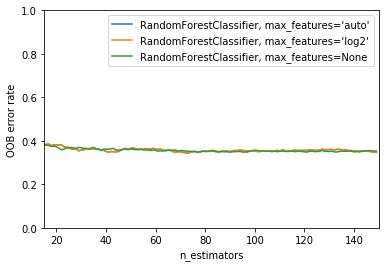

In [18]:
# Author: Kian Ho <hui.kian.ho@gmail.com>
#         Gilles Louppe <g.louppe@gmail.com>
#         Andreas Mueller <amueller@ais.uni-bonn.de>
#
# License: BSD 3 Clause

import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

print(__doc__)

RANDOM_STATE = 123

# Generate a binary classification dataset.
# X, y = make_classification(n_samples=500, n_features=25,
#                           n_clusters_per_class=1, n_informative=15,
#                           random_state=RANDOM_STATE)

X = df[["ema_6", "ema_12", "ema_24", "p_ema_6", "p_ema_12", "p_ema_24", "rsi_7", "rsi_14", "rsi_28"]]

y = df["Choice_3"]

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestClassifier, max_features='auto'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="auto",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)
error_rate_test = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 150
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

for label, clf in ensemble_clfs:
    print(label)
    for i in range(min_estimators, max_estimators):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))
        oob_error_test = 1 - clf.score(X_test, y_test)
        error_rate_test[label].append((i, oob_error_test))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    print(label)
    print(clf_err)
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.ylim(0,1.00)
plt.show()

RandomForestClassifier, max_features='auto'
[(15, 0.3831488314883149), (16, 0.3837638376383764), (17, 0.3856088560885609), (18, 0.37761377613776137), (19, 0.3825338253382534), (20, 0.3825338253382534), (21, 0.3819188191881919), (22, 0.38130381303813043), (23, 0.3739237392373924), (24, 0.37023370233702335), (25, 0.37023370233702335), (26, 0.36223862238622384), (27, 0.36285362853628533), (28, 0.36223862238622384), (29, 0.3548585485854858), (30, 0.3579335793357934), (31, 0.3591635916359164), (32, 0.3646986469864698), (33, 0.36162361623616235), (34, 0.3640836408364083), (35, 0.3640836408364083), (36, 0.36162361623616235), (37, 0.36285362853628533), (38, 0.3560885608856088), (39, 0.3573185731857319), (40, 0.35178351783517836), (41, 0.3474784747847478), (42, 0.35116851168511687), (43, 0.3505535055350554), (44, 0.3505535055350554), (45, 0.35116851168511687), (46, 0.3579335793357934), (47, 0.36285362853628533), (48, 0.3659286592865929), (49, 0.36162361623616235), (50, 0.3659286592865929), (51,

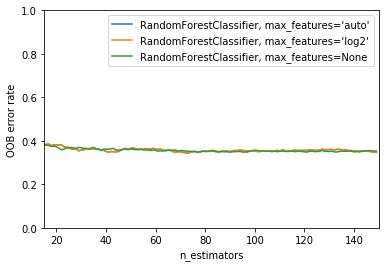

In [19]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    print(label)
    print(clf_err)
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.ylim(0,1.00)
plt.show()

C:\Users\thead\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


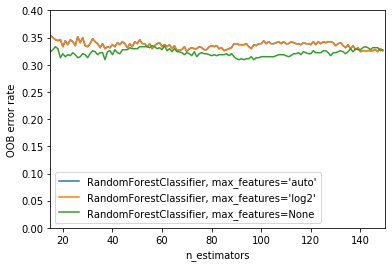

In [20]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate_test.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="bottom right")
plt.ylim(0,0.40)
plt.show()

In [21]:
error_rate

OrderedDict([("RandomForestClassifier, max_features='auto'",
              [(15, 0.3831488314883149),
               (16, 0.3837638376383764),
               (17, 0.3856088560885609),
               (18, 0.37761377613776137),
               (19, 0.3825338253382534),
               (20, 0.3825338253382534),
               (21, 0.3819188191881919),
               (22, 0.38130381303813043),
               (23, 0.3739237392373924),
               (24, 0.37023370233702335),
               (25, 0.37023370233702335),
               (26, 0.36223862238622384),
               (27, 0.36285362853628533),
               (28, 0.36223862238622384),
               (29, 0.3548585485854858),
               (30, 0.3579335793357934),
               (31, 0.3591635916359164),
               (32, 0.3646986469864698),
               (33, 0.36162361623616235),
               (34, 0.3640836408364083),
               (35, 0.3640836408364083),
               (36, 0.36162361623616235),
               (37, 0.362853

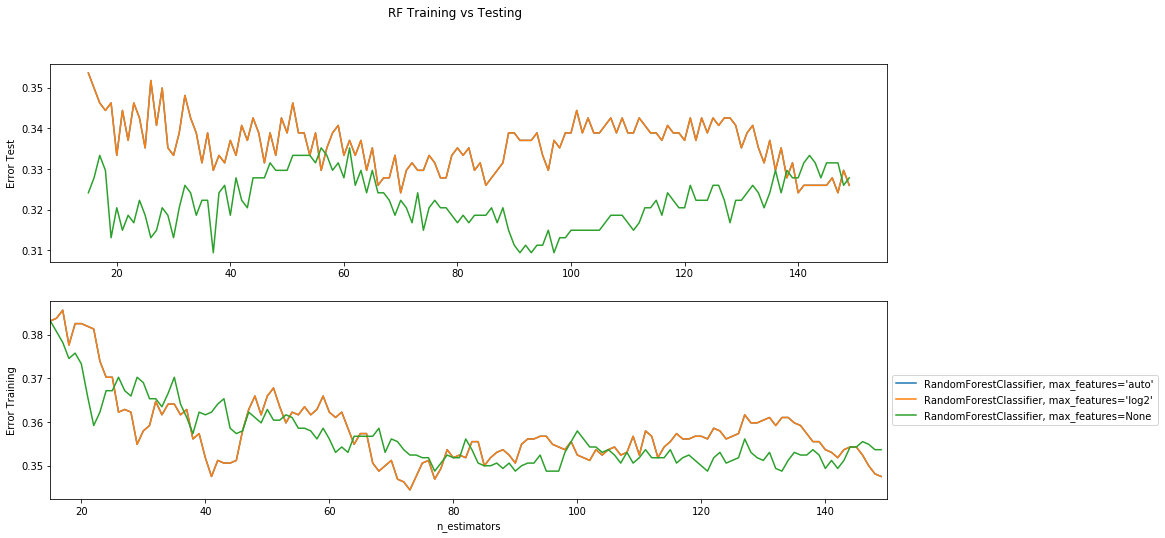

In [22]:
fig, axs = plt.subplots(2, figsize=(15, 8))
fig.suptitle('RF Training vs Testing')

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate_test.items():
    xs, ys = zip(*clf_err)
    axs[0].plot(xs, ys, label=label)
    
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    axs[1].plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
axs[1].set_ylabel("Error Training")
axs[0].set_ylabel("Error Test")

# plt.legend(loc="outside")
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.ylim(0,0.40)
plt.show()



indices [8 6 3 2 5 7 4 0 1]
X.shape[1] 9
X (2169, 9)
['rsi_28', 'rsi_7', 'p_ema_6', 'ema_24', 'p_ema_24', 'rsi_14', 'p_ema_12', 'ema_6', 'ema_12']


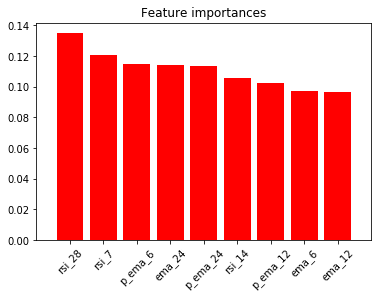

In [32]:
import numpy as np
labels = []
importances = clf.feature_importances_
# std = np.std([tree.feature_importances_ for tree in clf.estimators_],
#             axis=0)
indices = np.argsort(importances)[::-1]
print('indices', indices)
# for f in range(X.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices,rotation = 45)
plt.xlim([-1, X.shape[1]])
print('X.shape[1]', X.shape[1])
print('X', X.shape)
for i in indices:
    labels.append(X.columns.values.tolist()[i])

print(labels)

plt.xticks(ticks = range(X.shape[1]), labels = labels)
#labels = [for i in indices ]
plt.show()

In [33]:
# We can sort the features by their importance
indicator_ranking = sorted(zip(clf.feature_importances_, X.columns.values.tolist()), reverse=True)
indicator_ranking

[(0.1350451157718322, 'rsi_28'),
 (0.12099033812429572, 'rsi_7'),
 (0.11458847275876577, 'p_ema_6'),
 (0.11389098941380349, 'ema_24'),
 (0.11350446129347855, 'p_ema_24'),
 (0.10578274020142124, 'rsi_14'),
 (0.10235972298382437, 'p_ema_12'),
 (0.09743072965126084, 'ema_6'),
 (0.09640742980131774, 'ema_12')]

In [34]:
X.columns.values.tolist()

['ema_6',
 'ema_12',
 'ema_24',
 'p_ema_6',
 'p_ema_12',
 'p_ema_24',
 'rsi_7',
 'rsi_14',
 'rsi_28']

In [35]:
labels = []
for i in indices:
    print(i)
    labels.append(X.columns.values.tolist()[i])
print(labels)

8
6
3
2
5
7
4
0
1
['rsi_28', 'rsi_7', 'p_ema_6', 'ema_24', 'p_ema_24', 'rsi_14', 'p_ema_12', 'ema_6', 'ema_12']


In [36]:
clf.feature_importances_

array([0.09743073, 0.09640743, 0.11389099, 0.11458847, 0.10235972,
       0.11350446, 0.12099034, 0.10578274, 0.13504512])

In [37]:
indices

array([8, 6, 3, 2, 5, 7, 4, 0, 1], dtype=int64)

In [38]:
print(f"The error rate of our model is: {clf.oob_score_}")

The error rate of our model is: 0.6463714637146372


In [39]:
x = df[["ema_6", "ema_12", "ema_24", "p_ema_6", "p_ema_12", "p_ema_24", "rsi_7", "rsi_14", "rsi_28"]]
x["model_predictions"] = clf.predict(x)
x["target_values"] = y

C:\Users\thead\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\thead\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
x

,ema_6,ema_12,ema_24,p_ema_6,p_ema_12,p_ema_24,rsi_7,rsi_14,rsi_28,model_predictions,target_values
27,379.306277,372.884433,381.625049,0.946208,0.930188,0.951992,71.956219,56.293392,48.558885,SHORT,SHORT
28,383.725343,376.251907,382.676886,0.972015,0.953084,0.969359,65.644923,53.755190,47.154156,SHORT,SHORT
29,383.391245,377.221767,382.667215,1.002183,0.986056,1.000291,54.475130,48.988694,44.480312,LONG,LONG
30,383.496031,378.227341,382.754478,0.999317,0.985588,0.997385,55.347251,49.463490,44.799679,LONG,LONG
31,385.766304,380.260363,383.449478,0.985501,0.971435,0.979582,60.929485,52.506761,46.827403,SHORT,SHORT
...,...,...,...,...,...,...,...,...,...,...,...
2193,10809.668685,10737.571828,10831.084798,0.987673,0.981085,0.989629,62.123761,52.050299,51.523217,SHORT,SHORT
2194,10891.005255,10792.460267,10852.145749,0.981672,0.972789,0.978169,67.845442,54.970132,52.902128,SHORT,SHORT
2195,10904.509892,10814.892762,10859.035808,0.996913,0.988720,0.992756,57.317844,51.453646,51.324314,SHORT,SHORT
2196,10778.152713,10760.641532,10827.293724,1.030194,1.028520,1.034891,36.928573,42.519744,46.900117,LONG,LONG
